In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D


%matplotlib inline


# Principal Component Analysis

Principal component analysis is one of the methods of decreasing dimensionality of data. It aims into transforming bigger set of correlated features into smaller subset of uncorellated ones. The idea is as follows: assuming that our points are vectors in $\mathbb{R}^n$ space, we choose new orthogonal set $e'_{1}, e'_{2},... e'_{k}$, such that in the first place, the variance along $e'_{1}$ is maximized, then variance along $e'_{2}$, and so on up to the moment $k$ when we decide, that introducing new dimensions (features) carries low extra information (variability).

<img src="pca.png">

We shall skip strict mathematic formulation of this problem (see http://cs229.stanford.edu/notes/cs229-notes10.pdf). Instead, we'll use PCA routine provided by sklearn package.

Our data will consist of three features. Two first are independent and gaussian distributed. The third feature is their sum after introduction of noise.

In [2]:
X = np.random.normal(size = (1000,2))
noise = np.random.normal(size = (1000,1))/4
X = np.hstack((X, (X.T[0] + X.T[1] + noise.T).T/np.sqrt(2.25)))

pca = PCA(.999) # returns components responsible for 99.9% of variability
pca.fit(X);

After performing PCA we can verify resulting components and their variability content:

In [3]:
pca.components_

array([[ 0.56283509,  0.45204463,  0.69200601],
       [-0.66505586,  0.74481132,  0.05437644],
       [-0.49083333, -0.49082762,  0.71984088]])

In [4]:
pca.explained_variance_ / sum(pca.explained_variance_)

array([ 0.64723353,  0.3481668 ,  0.00459968])

As it was expected, the third component has minor influence on variability. It can therefore be excluded from further analysis.

![SegmentLocal](pca.gif "segment")

After this introductory examples we shall see how we can apply PCA in few real case examples.

# MNIST

MNIST is a dataset of 60000 handwritten digits, commonly used as data analysis benchmark. We will try to cluster images into 10 clusters, with and without PCA, comparing homogeneity and time.

In [5]:
mnist = np.array(pd.read_csv("mnist_train.csv", header=None))

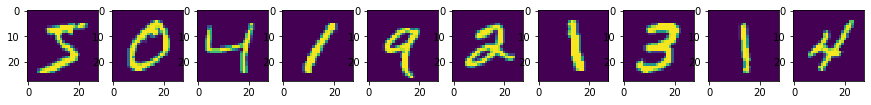

In [6]:
X = np.array(mnist[:,1:])
y = np.array(mnist[:,0])

plt.figure(figsize=(15,8))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X[i].reshape(28,28))

## Preprocessing
We start with standardisation of our data.

/home/kacper/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


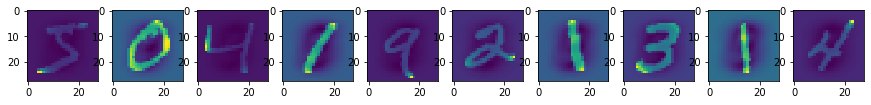

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

plt.figure(figsize=(15,8))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X[i].reshape(28,28))

## Ex 1.
Explain, why condition of $\sigma = 1$ for every feature is essential for PCA.

In [8]:
# Here goes your explanation

## PCA
## Ex 2.
a) Perform PCA on MNIST data in order to obtain 784 components.  
b) Plot 10 components of highest variance content.  
c) Plot cumulative variance content againts number of components. How many components do we need to obtain 50% of variability?

In [9]:
# a)

#Here goes your code. Hint: n_components

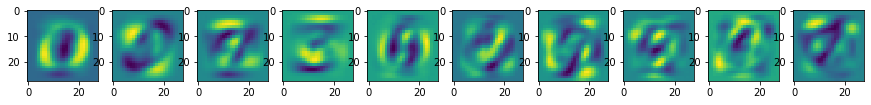

In [10]:
# b)

#Here goes your code. 

Components to obtain 50% of variance content:
38


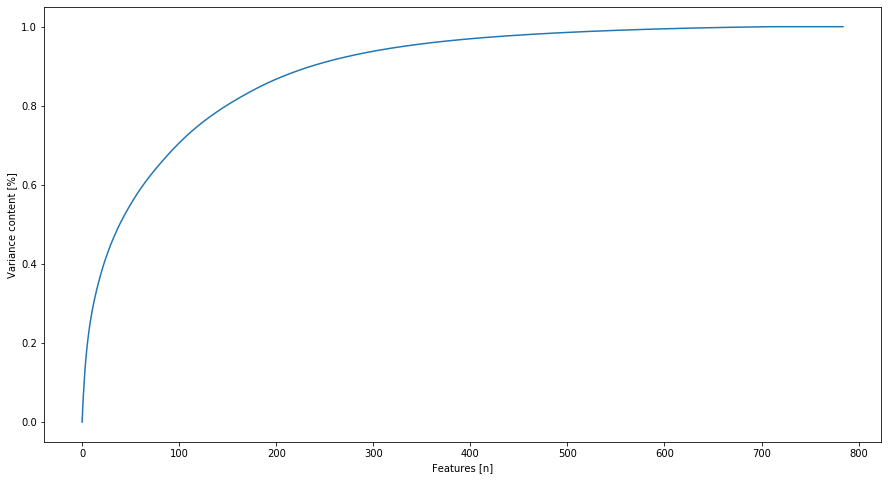

In [11]:
# c)

#Here goes your code. 

## Ex 3
Plot first 10 of MNIST images after projecting on:  
a) 784 components,  
b) 400 components,  
c) 200 components,  
d) 100 components,  
e) components which contain 50% of variance content,  
f) 7 components (7-segment digital clock).  

Check the change after reverse standardisation.

In [12]:
X_PCA = pca.transform(X);

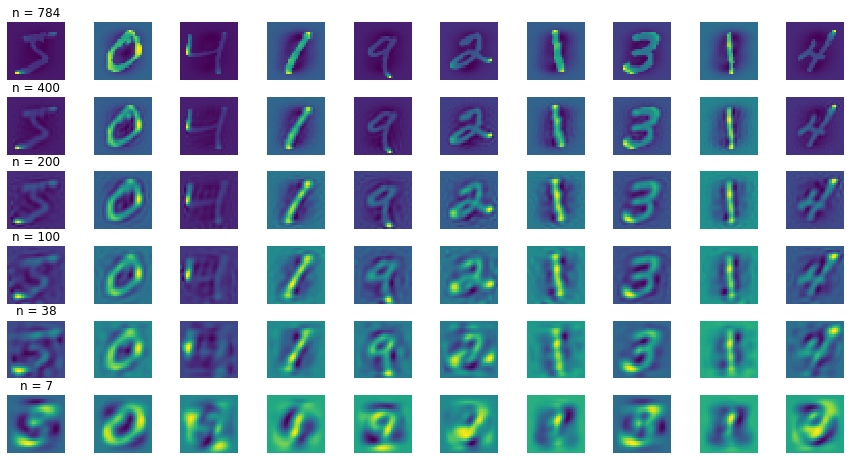

In [13]:
#Without reverse standardisation

#Here goes your code. Hint: express images as linear combination of components.

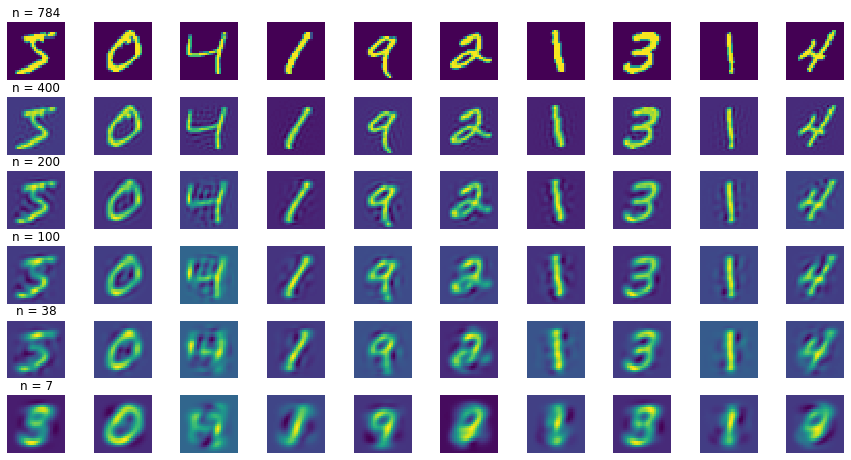

In [14]:
#With reverse standardisation

#Here goes your code. Hint: scaler.inverse_transform()

## Ex 4
Visualize MNIST dataset in the new coordinate space (with PCA component as basis). You're free to choose the form (2D, 3D, scatterplot, heatmap).

In [1]:
# Here goes your code


![SegmentLocal](clusters.gif "segment")

## Ex 5
For original data and every projection from Ex 3 perform k-means clustering (10 clusters). Measure homogeneity and evaluation time. Plot cluster elements of the best and worst clustering.

In [16]:
from sklearn.metrics.cluster import homogeneity_score
from sklearn.cluster import KMeans
import time

In [17]:
#a)


#Here goes your code. Hint: time.time(), homogeneity_score(labels, true_labels)


Original data.
Time elapsed: 116.17113447189331s
Homogenity Score: 0.4445684141482267


In [18]:
#b)


#Here goes your code. Hint: time.time(), homogeneity_score(labels, true_labels)


400 components.
Time elapsed: 90.22278475761414s
Homogenity Score: 0.4446464782163763


In [19]:
#c)


#Here goes your code. Hint: time.time(), homogeneity_score(labels, true_labels)


200 components.
Time elapsed: 41.343252182006836s
Homogenity Score: 0.4452156555474297


In [20]:
#d)


#Here goes your code. Hint: time.time(), homogeneity_score(labels, true_labels)


100 components.
Time elapsed: 20.02952289581299s
Homogenity Score: 0.4449110080036493


In [21]:
#e)


#Here goes your code. Hint: time.time(), homogeneity_score(labels, true_labels)


35 components.
Time elapsed: 11.676686763763428s
Homogenity Score: 0.4422197931388776


In [22]:
#f)


#Here goes your code. Hint: time.time(), homogeneity_score(labels, true_labels)


7 components.
Time elapsed: 8.029278755187988s
Homogenity Score: 0.4096851484347813


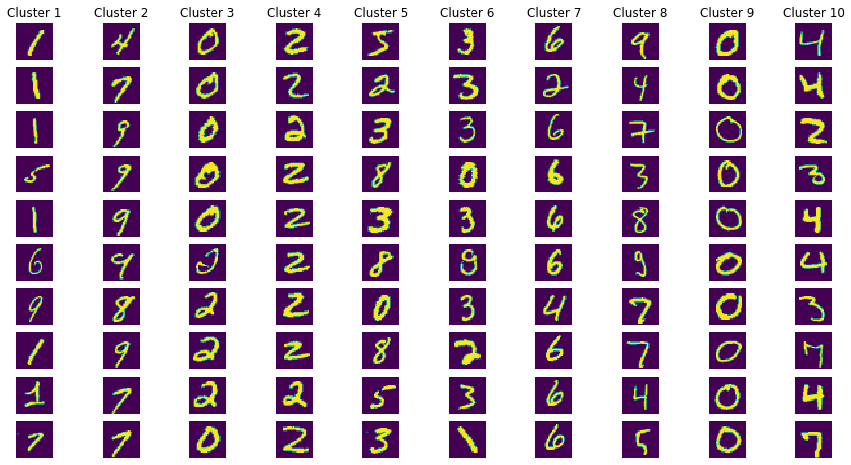

In [23]:
#Worst clustering



#Here goes your code.


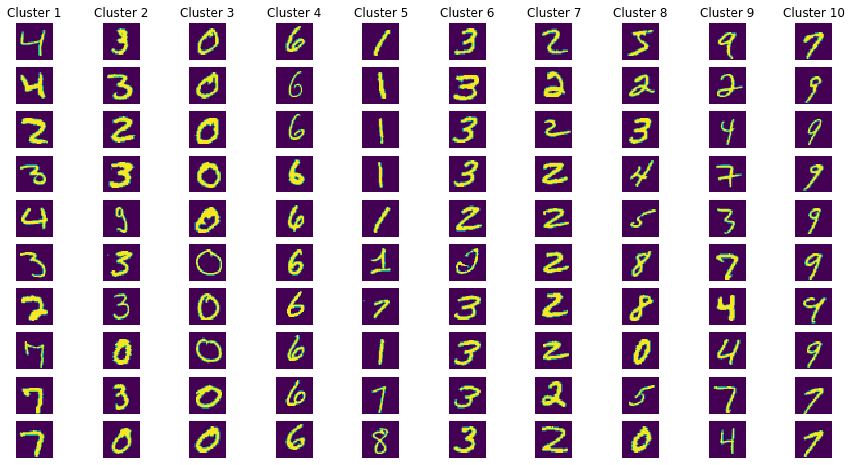

In [24]:
#Best clustering



#Here goes your code.

## The Optimal Number of Clusters
In the typical clustering task do not alway know apriori an optimal number of clusters. It is often in fact a value which is to be obtained as a result of our analysis. We need therefore a metric, which allows us to evaluate a quality of the clustering. One of the most simple and commonly used is called **silhouette metric**.

Let $X$ be a set divided into $n$ clusters $C_{j}$. For every element $x_{i} \in C_{j}$ we will define:  

$a(x_{i}) = \displaystyle \dfrac{1}{1-|C_{j}|} \sum_{x_{k} \in C_{j}} dist(x_{k}, x_{i}),$  
$b(x_{i}) = \displaystyle \min_{l \neq j} \dfrac{1}{|C_{l}|} \sum_{x_{k} \in C_{l}} dist(x_{k}, x_{i}). $  

Then we can define a single element silhouette metric as:

$ s(x_{i}) = \displaystyle \dfrac{b(x_{i}) - a(x_{i})}{\max(a(x_{i}), b(x_{i}))}. $

The interpretation is easy. For given element $x_{i}$, the value $a(x_{i})$ tells us, how close it is to other elements of the cluster. The value $b(x_{i})$ indicates, what is the distance to the closest other cluster. Assuming, that in good clustering clusters should be compact (which implies small $a(x_{i})$) and distinct (which implies high $b(x_{i})$), we define the metric $s(x_{i})$, which approaches $1$ for $a(x_{i}) \ll b(x_{i})$ and $-1$ for $a(x_{i}) \gg b(x_{i})$.

Finally, we can set the metric for whole set $X$ and clustering $C_{j}$ as an arithmetic mean of single element metrics:

$a(x_{i}) = \displaystyle \dfrac{1}{|X|} \sum_{x_{k} \in X} s(x_{i}).$   


## Ex 6
a) Find an optimal number of clusters for MNIST dataset. For that, plot the silhouette metric against number of clusters. Set the number of PCA components to 38. You can reduce the size of dataset (down to 1000 or 6000 samples) to make it suitable for computational resources of your workstation.   
b) For an optimal number of clusters, plot example images from every of them in order to check their homogenity.


Optimal number of clusters: 19


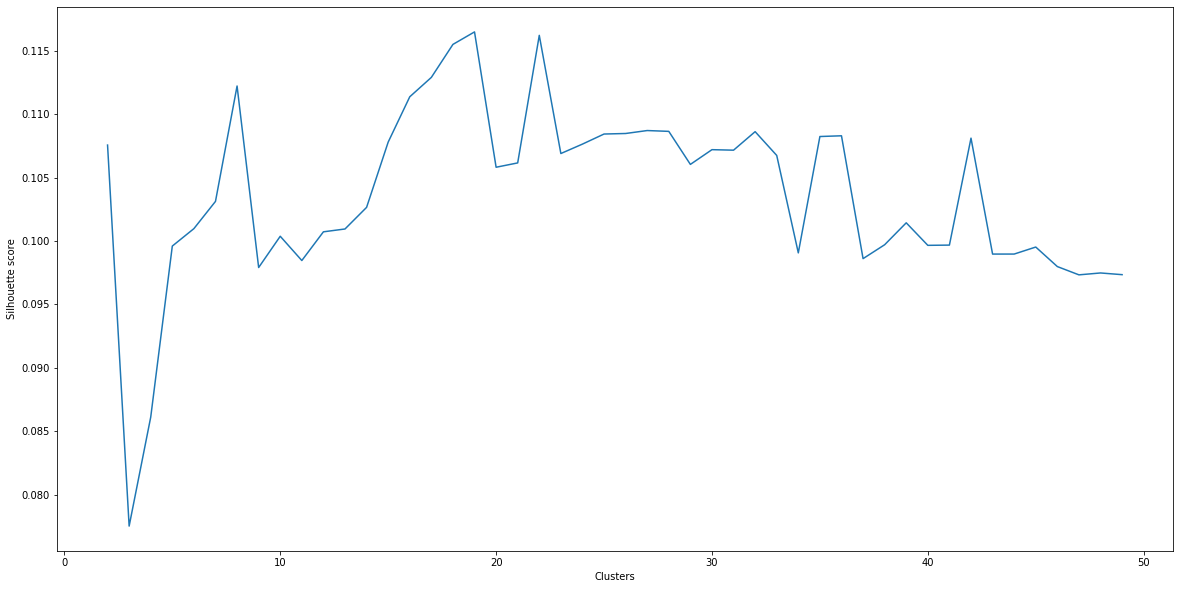

In [30]:
#a)

from sklearn.metrics import silhouette_score

pca = PCA(n_components=38)
X_PCA = pca.fit_transform(X);


#Here goes your code.


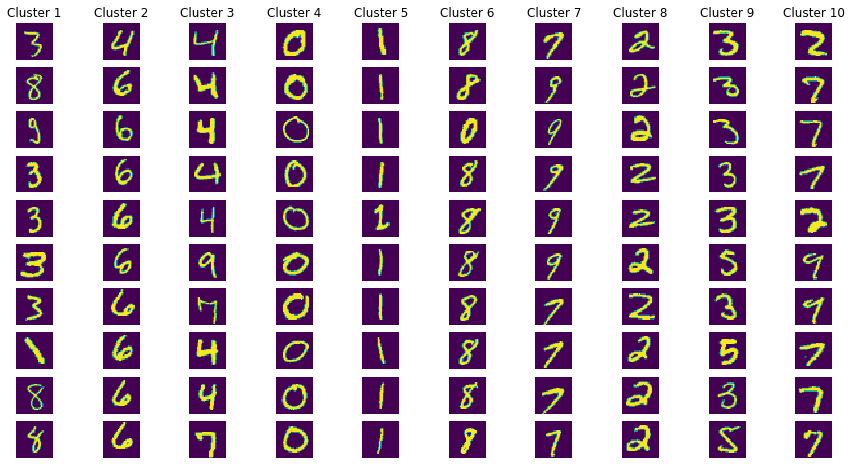

In [31]:
#b)

#Here goes your code.


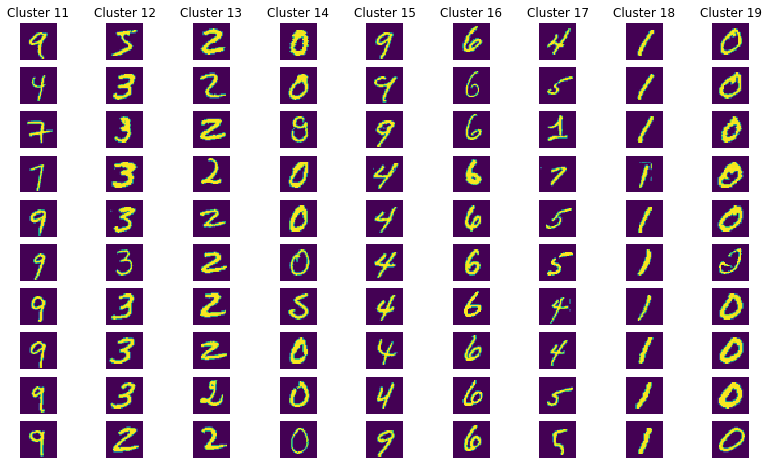

In [32]:
#Optimal clustering part2


#Here goes your code.